In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [13]:
df = pd.read_csv("KORONA.TXT", skiprows=20, header=None, delimiter="\t")
df

,0,1,2,3,4,5
0,NaN,0.9,mV,DC,01:27:04pm,231.0
1,NaN,0.9,mV,DC,01:27:09pm,231.0
2,NaN,0.9,mV,DC,01:27:14pm,231.0
3,NaN,0.9,mV,DC,01:27:19pm,231.0
4,NaN,0.8,mV,DC,01:27:24pm,232.0
...,...,...,...,...,...,...
476,NaN,18.9,mV,DC,02:06:44pm,51.0
477,NaN,18.9,mV,DC,02:06:49pm,51.0
478,NaN,18.9,mV,DC,02:06:54pm,51.0
479,NaN,18.9,mV,DC,02:06:59pm,51.0


In [14]:
df = df.drop(0, 1)
df = df[:-1]
df

,1,2,3,4,5
0,0.9,mV,DC,01:27:04pm,231.0
1,0.9,mV,DC,01:27:09pm,231.0
2,0.9,mV,DC,01:27:14pm,231.0
3,0.9,mV,DC,01:27:19pm,231.0
4,0.8,mV,DC,01:27:24pm,232.0
...,...,...,...,...,...
475,19.0,mV,DC,02:06:39pm,50.0
476,18.9,mV,DC,02:06:44pm,51.0
477,18.9,mV,DC,02:06:49pm,51.0
478,18.9,mV,DC,02:06:54pm,51.0


In [15]:
# df.columns = ['Value', 'Unit', 'Current', 'Time', 'Nwm']
df.rename(columns={1:'Value', 2:'Unit', 3:'Current', 4:'Time', 5:'Nwm'}, inplace=True)
df

,Value,Unit,Current,Time,Nwm
0,0.9,mV,DC,01:27:04pm,231.0
1,0.9,mV,DC,01:27:09pm,231.0
2,0.9,mV,DC,01:27:14pm,231.0
3,0.9,mV,DC,01:27:19pm,231.0
4,0.8,mV,DC,01:27:24pm,232.0
...,...,...,...,...,...
475,19.0,mV,DC,02:06:39pm,50.0
476,18.9,mV,DC,02:06:44pm,51.0
477,18.9,mV,DC,02:06:49pm,51.0
478,18.9,mV,DC,02:06:54pm,51.0


In [16]:
mV = df["Value"].to_numpy()

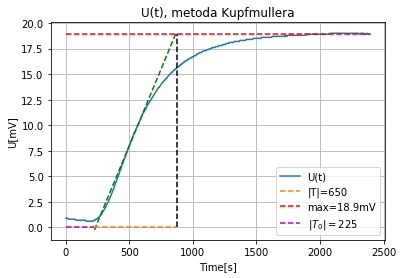

In [101]:
x = np.arange(0, len(mV)*5, 5)
plt.plot(x, mV, label="U(t)")
plt.grid(True)
plt.xlabel("Time[s]")
plt.ylabel("U[mV]")
plt.title("U(t), metoda Kupfmullera")
plt.plot(x[45:175], 0.03*x[45:175]-7, 'g--')
plt.plot(x[45:175], 0*x[45:175], 'C1--', label="|T|="+str(x[175]-x[45]))
plt.plot(x, 18.9*np.ones(len(x)), 'r--',label="max=18.9mV")
plt.plot(x[0:45],np.zeros(len(x[0:45])), 'm--', label="$|T_{0}|=$"+str(x[45]))
plt.plot([x[175], x[175]], [0, 18.9], 'k--')
plt.legend()
plt.savefig("kumpf.png", dpi=300)
plt.show()